# Setting

In [2]:
# 파이썬 ≥ 3.5 필수
import sys
assert sys.version_info >= (3, 5)

In [3]:
sys.version

'3.9.17 (main, Jul  5 2023, 21:22:06) [MSC v.1916 64 bit (AMD64)]'

# SVM

- 서포트 벡터(support vector) : 결정 경계선과 가장 가까이 맞닿은 데이터 포인트를 의미한다.
- 마진(margin) : 서포트 벡터와 결정 경계 사이의 거리를 말하는 것으로 SVM의 목표는 바로 이 마진을 최대로 하는 결정 경계를 찾는 것이다.
- 마진이 클수록 우리가 현재 알지 못하는 새로운 데이터에 대해 안정적으로 분류할 가능성이 높기 때문이다.
- 비용(cost) : 성능이 좋은 머신러닝 모델이란 학습시 에러가 적은 모델이 아니라 테스트 및 운용시 에러가 적은 모델이다. 즉, 약간의 오류를 허용하기 위해 비용(C)이라는 변수를 사용한다.
- 비용이 낮을수록, 마진을 최대한 높이고, 학습 에러율을 증가시키는 방향으로 결정 경계선을 만든다.
- 비용이 높을수록, 마진은 낮아지고, 학습에러율은 감소하는 방향으로 결정 경계선을 만든다.
- 비용이 너무 낮으면 과소적합의 위험이 있고, 너무 높으면 과대적합의 위험이 있으므로 적절한 비용값을 찾는 과정이 중요하다.
- 결정 경계(decision boundary) : 주어진 데이터를 통해 잘 분류해내는 선
- 데이터의 벡터 공간을 N차원이라고 할 경우, 결정 경계는 N-1차원이다.
- 만약 데이터가 3차원이라면 결정경계는 선이아니라 면으로 나타난다. 이러한 이유로 결정 경계는 때로는 초평면(hyperplane)이라고 부르기도 한다.
- 커널 트릭(kernel trick) : 2차원 공간에서는 두 개의 데이터 집합을 가로지르는 선을 찾는 것이고, 3차원 공간에서는 두 개의 데이터 집합을 가로지르는 초평면을 찾는 것이 SVM의 핵심이다.
- 저차원의 데이터를 고차원의 데이털 옮겨주는 함수는 매핑함수라고 부른다.
- 고차원으로 데이터를 옮겨서 결정 경계를 찾는 법이 커널 트릭이다.
- 선형 SVM : 커널을 사용하지 않고 데이터를 분류하는 것으로 비용(C)을 조절해서 마진의 크기를 조절
- 커널 트릭 : 주어진 데이터가 선형 분리로 불가능할 경우 고차원으로 데이터를 옮기는 효과를 통해 결정 경계를 찾는것으로 비용(C)와 gamma를 조절해서 마진을 조절할 수 있다.
- RBF 커널 : 가우시안 RBF 커널을 사용하는 것으로 가우시안 함수의 표준편차를 조정함으로써 결정 경계의 곡률을 조정하는데 이 표준편차 조정 변수를 감마(gamma)라고 부른다.
- 감마가 커지면 데이터 포인트별로 허용하는 표준편차가 작아져서 결정경계가 작아지면서 구부러지는 모양을 나타낸다.

# 문제 정의

- 2017년 NBA 농구 선수의 경기기록을 학습해서 포지션을 예측하자
- 최적의 SVM 파라미터 찾기

In [4]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import seaborn as sns
import os
import seaborn as sns

import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# seaborn style
sns.set_theme()

# 경고없애기
import warnings
warnings.filterwarnings(action='ignore') 

# 데이터 로딩

In [5]:
df = pd.read_csv('basketball_stat.csv')
df.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


In [6]:
x = df.drop(['Pos'], axis=1)
y = df['Pos']

print(x.shape, y.shape)

(100, 7) (100,)


# 모델 구현

## 훈련세트와 테스트 세트 분리

In [28]:
from sklearn.model_selection import train_test_split


x = df[['3P', 'BLK']]
y = df['Pos']

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=0)


## SVM 최적의 파라미터 찾기

1. C(cost) : 비용, 결정 경계선의 마진을 결정하는 파라미터, 규제(오류를 얼마나 허용할것인지)
  - 클수로 하드마진, 작을수록 소프트마진
2. gamma : 커널의 데이터 포인트의 표준편차를 결정하는 파라미터
  - 'scale' : 결정 경계를 얼마나 유연하게 그릴건지를 결정
  - 클수록 과대적합에 위험이 있다.

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC

# C(0.1)
# kernel : rbf(훈련 세트가 너무 크지 않을 때, 가우시안 커널)
# kernel은 데이터셋의 형태에 따라서 다르게 지정한다.
# 선형 데이터셋일 경우 'linear', 비선형 'poly(다항식)', 'rbg(가우시안)'

def svc_param_selection(x_train, y_train, nfolds):
    svm_params = [
        {'kernel': ['rbf'],
                  'gamma' : [0.00001, 0.0001, 0.001, 0.01, 0.1, 1],
                  'C' : [0.01, 0.1, 1, 10, 100, 1000]}
    ]
    
    clf = GridSearchCV(SVC(), svm_params, cv=nfolds)
    clf.fit(x_train, y_train)
    print(clf.best_params_)
    
    return clf

In [29]:
x_train = df[['3P', 'BLK']]
y_train = df[['Pos']]

clf = svc_param_selection(x_train, y_train.values.ravel(), 10)

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}


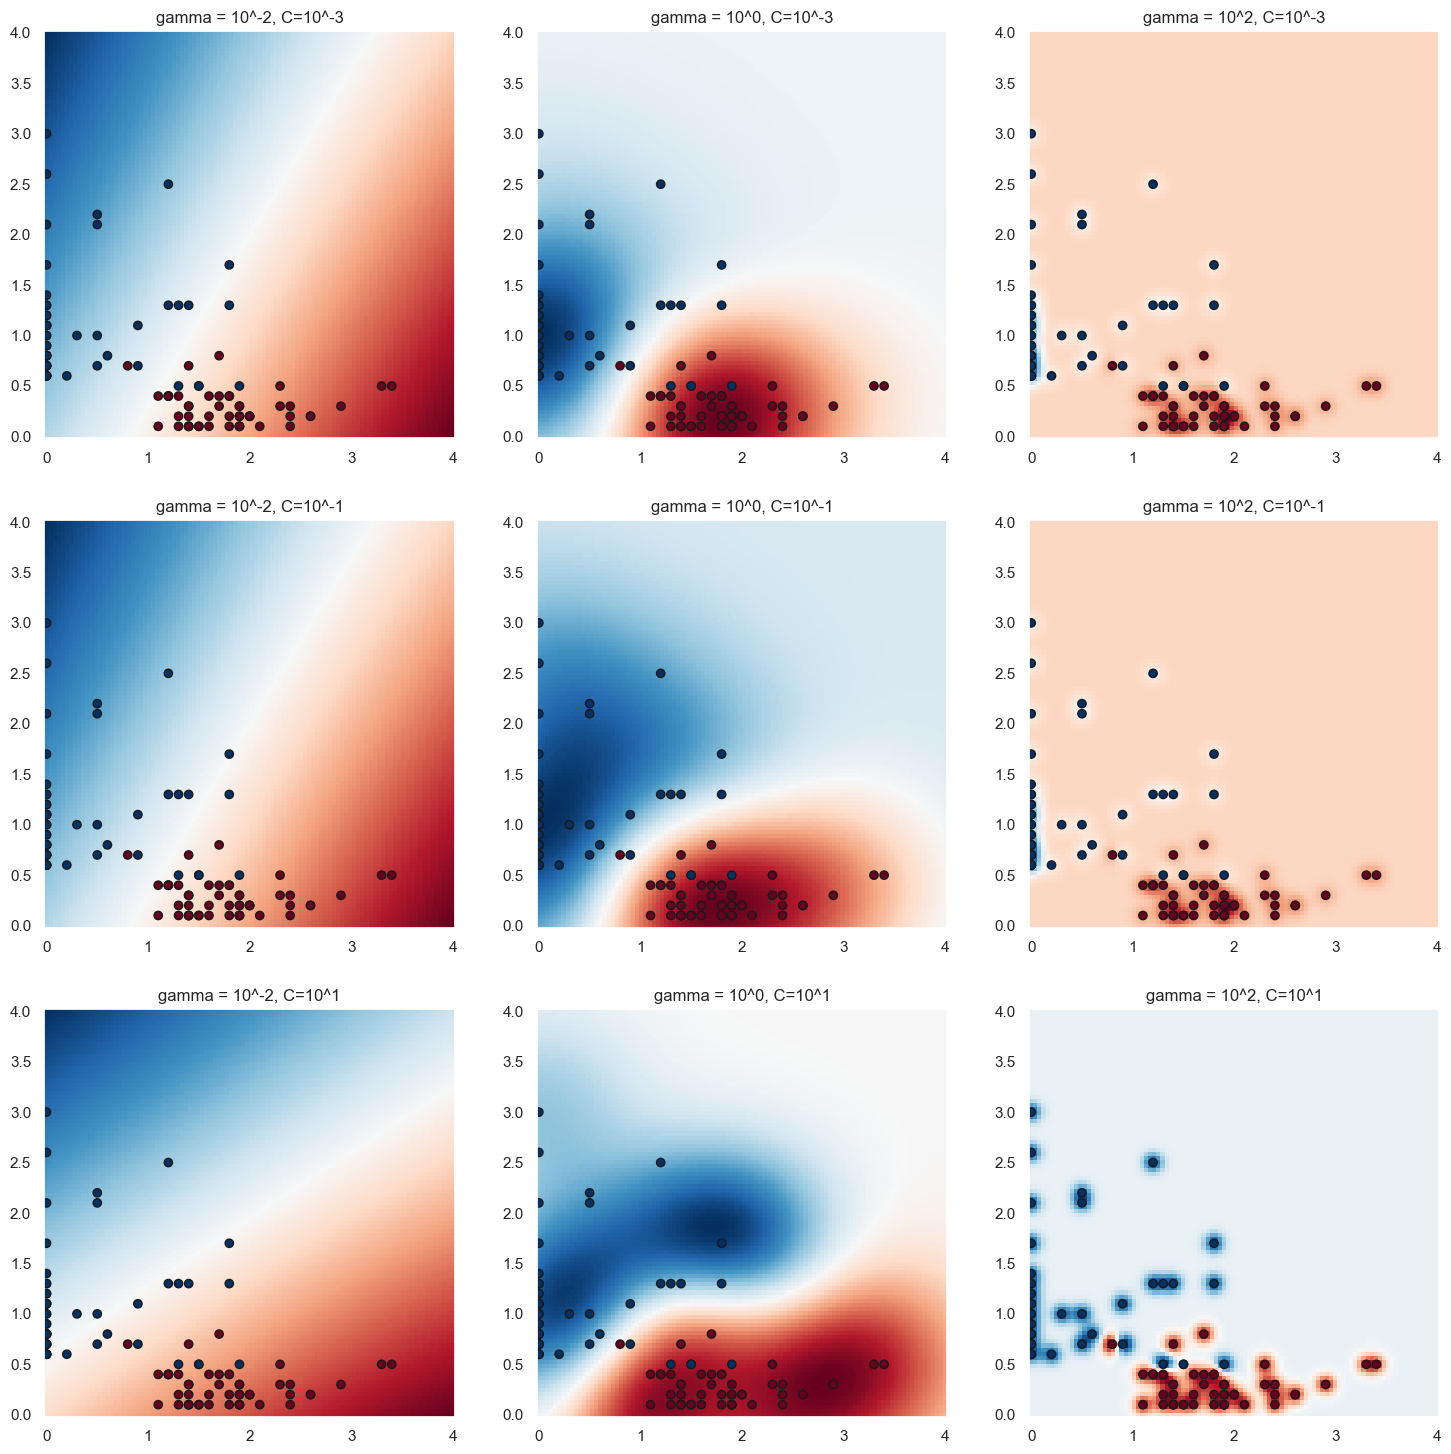

In [24]:
# 3 by 3 시각화
c_list = []
c_list.append(clf.best_params_['C'] * 0.01)
c_list.append(clf.best_params_['C'])
c_list.append(clf.best_params_['C'] * 100)

gamma_list = []
gamma_list.append(clf.best_params_['gamma'] * 0.01)
gamma_list.append(clf.best_params_['gamma'])
gamma_list.append(clf.best_params_['gamma'] * 100)

x = df[['3P', 'BLK']]
y = df['Pos'].tolist()

# 포지션에 해당하는 문자열(SG, C) 벡터화
position = []
for p in y:
    if p == 'C':
        position.append(0)
    else:
        position.append(1)
        
# 각각의 파라미터에 해당하는 모델을 생성하여 저장하는 리스트
classifiers = []
for c in c_list:
    for gamma in gamma_list:
        clf = SVC(C=c, gamma=gamma)
        clf.fit(x, y)
        classifiers.append((c, gamma, clf))
        
# 시각화를 위한 도화지 크기 지정
plt.figure(figsize=(18, 18)) 
# np.meshgrid : 1차원 좌표배열 N차원 직사각형 격자를 만드는 함수
xx, yy = np.meshgrid(np.linspace(0, 4, 100), np.linspace(0, 4, 100))

# decision_function(), predict_proba()
for (k, (c, gamma, clf)) in enumerate(classifiers):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.subplot(len(c_list), len(gamma_list), k + 1)
    plt.title('gamma = 10^%d, C=10^%d' % (np.log10(gamma), np.log10(c)), size='medium')
    
    plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
    plt.scatter(x['3P'], x['BLK'], c=position, cmap=plt.cm.RdBu_r, edgecolors='k')
      

# 검증과 테스트

In [30]:
pred = clf.predict(x_test)
print(classification_report(y_test, pred))
print('Accuracy : ', accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           C       1.00      0.91      0.95        11
          SG       0.90      1.00      0.95         9

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.96      0.95      0.95        20

Accuracy :  0.95


# 보고서

In [32]:
comparison = pd.DataFrame({'prediction':pred, 'Actual':y_test})
comparison

,prediction,Actual
26,SG,SG
86,SG,SG
2,C,C
55,SG,SG
75,C,C
93,C,C
16,C,C
73,SG,SG
54,SG,C
95,C,C


# 확인학습

- setosa와 versicolor만 선택하여 해당 데이터셋을 이용한 SVM 선형 분류

## 데이터 로딩

In [33]:
from sklearn.datasets import load_iris

iris = load_iris()
dir(iris)   # iris.keys()

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [35]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [37]:
x = iris['data']
y = iris['target']

x.shape, y.shape

((150, 4), (150,))

In [38]:
condition = (y == 0)|(y == 1)
x = x[condition]
y = y[condition]

x.shape, y.shape

((100, 4), (100,))

In [39]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [40]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [41]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [42]:
df = pd.DataFrame(iris.data, columns = ['sepal_length', 'sepal_width','petal_length', 'petal_width'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [47]:
df['target'] = iris.target
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


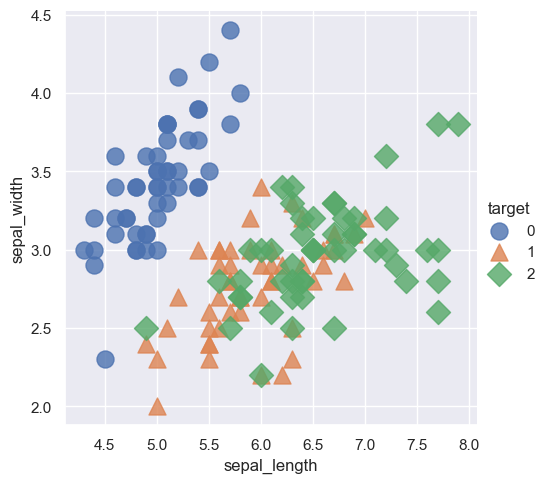

In [45]:
sns.lmplot(x = 'sepal_length', y = 'sepal_width', data = df, fit_reg = False, 
           scatter_kws={'s':150},
          hue = 'target',
          markers = ['o', '^', 'D'])
plt.show()

In [51]:
x = iris['data'][:, (2, 3)]
y = iris['target']

condition = (y == 0)|(y == 1)
x = x[condition]
y = y[condition]

x.shape, y.shape

((100, 2), (100,))

In [52]:
svm = SVC(kernel='linear', C=0.01)
svm.fit(x, y)

SVC(C=0.01, kernel='linear')

Text(0, 0.5, 'feature 1')

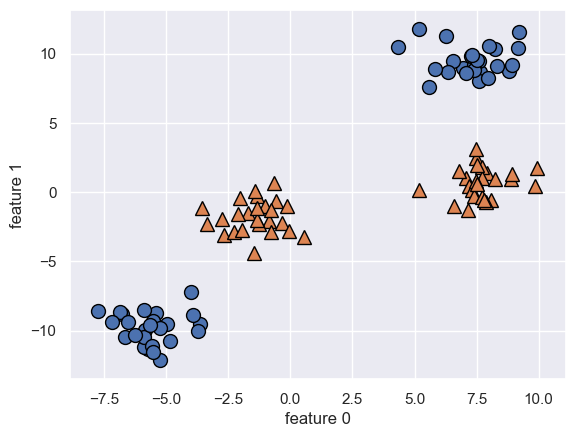

In [54]:
X, y = mglearn.datasets.make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

Text(0, 0.5, 'feature_1')

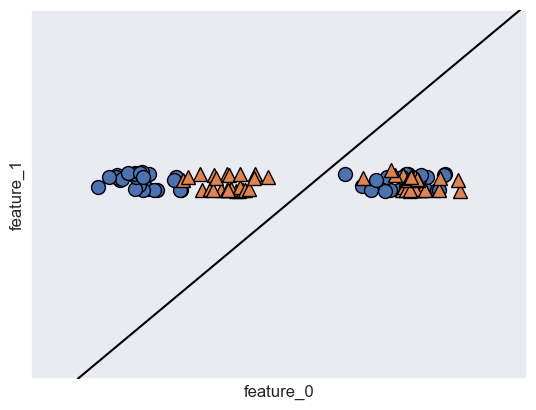

In [56]:
from sklearn.svm import LinearSVC

linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], x[:, 1], y)
plt.xlabel('feature_0')
plt.ylabel('feature_1')